<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/E4_Py_Stat_Hip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normality Test

By examining the shape of the distribution, you can get an idea of whether the data is normally distributed or skewed. However, for a more formal assessment of normality, statistical tests like the Shapiro-Wilk test or the Kolmogorov-Smirnov test are recommended.

<ipython-input-20-01111d9ebf8f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(premiums)


<Axes: ylabel='Density'>

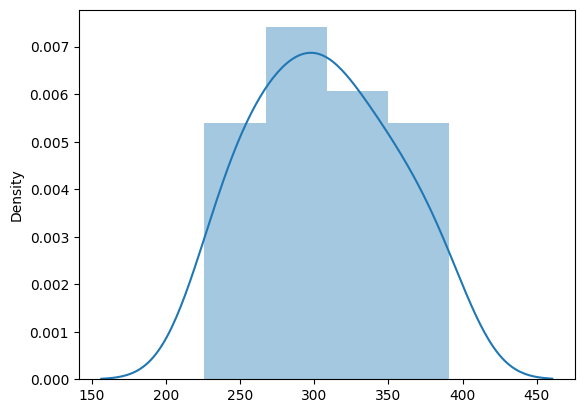

In [ ]:
import seaborn as sns
premiums = [333,	320,	301,	280,	270,	251,	260,	255,	355,	345,	355,	345,	366,	352,	331,	308,	297,	276,	286,	281,	391,	380,	391,	380,	300,	288,	271,	252,	243,	226,	234,	230,	320,	311,	320,	311]
sns.distplot(premiums)

In [ ]:
from scipy.stats import normaltest
normaltest(premiums)

NormaltestResult(statistic=2.8425253227965745, pvalue=0.24140900654140018)

# Hypothesis Test

## Two-Tailed Test



The company Suco Bom produces fruit juices in 500 ml packages. Its production process is almost entirely automated and the juice packaging is filled by a machine that sometimes presents a certain misadjustment, leading to errors in filling the packaging with more or less content. When the average volume drops below 500 ml, the company worries about losing sales and having problems with regulatory bodies. When the volume exceeds 500 ml, the company begins to worry about losses in the production process.

The quality control sector of the company Suco Bom periodically extracts samples from 50 packages to monitor the production process. For each sample, a hypothesis test is carried out to assess whether the machinery has become out of adjustment. The QA team assumes a 5% significance level.

Suppose now that a sample of 50 packages was selected and that the observed sample mean was 503.24 ml and standard deviation 4.48. Is this sample mean value sufficiently greater than 500 ml to make us reject the hypothesis that the process mean is 500 ml at the 5% significance level?

In [ ]:
from scipy.stats import norm
from numpy import sqrt
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#𝐻0:𝜇=500
#𝐻1:𝜇≠500
u=500
n =50
sig=0.05
z_sig_sob2 = norm.ppf(sig/2)
print(z_sig_sob2)
x=503.24
s=4.48
z=(x-u)/(s/sqrt(n))
z

-1.9599639845400545


5.113897256795581

In [ ]:

area=norm.cdf(z)
print(area)
pvalor=2*(1-area)
print(pvalor)
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

0.9999998422104751
3.155790497810784e-07
rejeita h0


In [ ]:
from statsmodels.stats.weightstats import ztest
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
ztest(x1 = amostra, value = u)


(5.109559775991873, 3.229103172445771e-07)

Conclusion: As the sample mean 𝑥¯ is significantly greater than 500 ml, we reject 𝐻0 . In this case, measures must be taken to adjust the machinery that fills the packages.

## One-tailed Test




A famous soft drink manufacturer claims that a 350 ml can of its flagship product contains a maximum of 37 grams of sugar. This claim leads us to understand that the average amount of sugar in a can of soda should be equal to or less than 37 g. A suspicious consumer with knowledge of statistical inference decides to test the manufacturer's claim and selects, at random, from a set of different establishments, a sample of 25 cans of the soft drink in question. Assuming that this population is distributed approximately as normal and considering a significance level of 5%, is it possible to accept the manufacturer's claim as valid?

In [ ]:
from scipy.stats import t as t_student
from numpy import mean, std
#𝐻0:𝜇≤37
#𝐻1:𝜇>37
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]
n=25
u=37
x=mean(amostra)
s=std(amostra)
sig<-0.05
conf = 1-sig
graus_de_lib = n-1
t_sig = t_student.ppf(conf, graus_de_lib)
print(t_sig)
t = (x - u) / (s / sqrt(n))
t

1.7108820799094275


-3.9568374713288734

In [ ]:
pvalor = 1-t_student.cdf(t, df = graus_de_lib)
pvalor
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

0.9997062063779475

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
test = DescrStatsW(amostra)
test.ttest_mean(value = u, alternative = 'larger')

(-3.8768931199520447, 0.9996406170303819, 24.0)

Conclusion: With a 95% confidence level we cannot reject 𝐻0, that is, the manufacturer's claim is true.


## Test two samples



In our dataset we have the income of heads of households obtained from the National Household Sample Survey - PNAD in 2015. A well-known problem in our country concerns income inequality, mainly between men and women.

Two random samples, one of 500 men and the other of 500 women, were selected from our dataset. In order to prove this inequality, test the equality of the means between these two samples with a significance level of 1%.

In [ ]:
homens = [300, 1000, 4000, 5000, 300, 350, 1200, 1200, 1100, 1800, 700, 5000, 250, 1560, 400, 5500, 3000, 0, 1100, 1500, 500, 500, 788, 500, 3000, 788, 2400, 788, 3300, 1350, 2500, 2000, 1300, 2430, 9000, 10120, 1380, 2000, 1400, 1000, 500, 1500, 2200, 2100, 4000, 1000, 1200, 2900, 1800, 2000, 788, 1576, 800, 2400, 788, 788, 788, 0, 12000, 7880, 850, 1000, 1000, 1600, 3800, 788, 1200, 300, 350, 700, 6000, 1500, 5000, 2000, 1200, 800, 250, 800, 1600, 400, 3000, 2304, 800, 1400, 450, 788, 2200, 6000, 1200, 4000, 6000, 1100, 1200, 1300, 3000, 3000, 1500, 1280, 788, 1400, 788, 4000, 0, 1000, 2500, 1300, 3000, 500, 1600, 2000, 1280, 150, 0, 0, 7000, 1061, 700, 788, 2000, 788, 10500, 788, 1600, 1050, 1100, 3000, 800, 1400, 1200, 2500, 1000, 1500, 1500, 900, 2000, 300, 3000, 788, 1400, 2000, 2000, 3000, 2600, 15000, 1500, 950, 1200, 1500, 7500, 1400, 350, 750, 1200, 788, 0, 2500, 1700, 788, 700, 1600, 1200, 320, 6000, 2000, 2000, 3000, 900, 2100, 0, 788, 1800, 1600, 4000, 1300, 1300, 1500, 8900, 1400, 788, 600, 1000, 950, 2000, 4000, 2300, 2000, 800, 2500, 1500, 1400, 800, 6000, 788, 900, 200, 1300, 788, 2600, 1500, 8000, 900, 2000, 2000, 350, 3000, 9580, 0, 400, 800, 1700, 1800, 1200, 18000, 9000, 3000, 1200, 700, 1200, 400, 987, 6000, 2000, 0, 0, 480, 500, 800, 1680, 10000, 1200, 1700, 788, 2200, 10000, 10000, 100, 1200, 1600, 2500, 1300, 1200, 1300, 2200, 200, 60, 1100, 1200, 6000, 4500, 100, 788, 2900, 2500, 900, 788, 2500, 4000, 788, 1400, 1000, 300, 788, 1000, 4000, 2200, 788, 1000, 1000, 600, 1600, 6000, 2500, 2500, 1000, 3000, 2200, 4500, 1500, 4300, 1500, 8500, 3200, 1200, 1200, 1500, 4000, 2000, 1350, 1500, 890, 5000, 2400, 13000, 800, 1500, 1500, 2000, 580, 500, 920, 1200, 2000, 788, 500, 20000, 1350, 1576, 500, 8000, 1800, 600, 1000, 3000, 4000, 1500, 788, 600, 2300, 1500, 500, 500, 800, 900, 8000, 1600, 3000, 788, 1500, 5200, 900, 3565, 650, 1700, 1600, 788, 1200, 788, 788, 100, 900, 1700, 10000, 1600, 200, 788, 1400, 1500, 400, 4200, 1400, 4000, 5516, 3500, 700, 1400, 1200, 0, 7000, 2000, 5000, 2000, 750, 3000, 2000, 1500, 200, 3000, 1700, 1500, 7000, 1500, 788, 2400, 2500, 1500, 2000, 1500, 2000, 1100, 800, 1800, 480, 3500, 700, 3400, 5000, 5000, 1300, 3000, 2000, 900, 2000, 1000, 1800, 0, 1500, 788, 3500, 875, 5000, 2000, 1300, 1600, 0, 750, 1200, 120, 1800, 1200, 788, 1000, 0, 1400, 2300, 7000, 4000, 5000, 788, 20000, 4000, 0, 1200, 1800, 500, 1000, 788, 1300, 5000, 50, 1700, 2000, 1600, 2000, 1350, 1500, 600, 1700, 780, 2446, 2100, 5000, 1700, 1200, 1000, 788, 4500, 1500, 788, 0, 1580, 1000, 4500, 2400, 788, 1100, 2000, 788, 100, 1200, 1200, 1200, 1000, 2000, 788, 2000, 15000, 600, 0, 1500, 3000, 4000, 900, 810, 600, 1500, 4000, 1200, 5000, 5300, 2500, 800, 0, 1400, 1500, 4000, 1200, 400, 1000, 820, 1000, 1000, 788, 1500, 2500, 1500, 220, 600, 788, 1750, 7000]
mulheres = [788, 1200, 6000, 1000, 788, 1100, 1900, 1577, 900, 950, 1200, 788, 788, 1100, 30, 620, 900, 1000, 1200, 2000, 0, 500, 1200, 1500, 1200, 1120, 788, 788, 2300, 2400, 3000, 788, 4000, 1000, 500, 500, 1700, 200, 6000, 400, 950, 1100, 50, 930, 850, 1100, 3500, 1500, 1200, 900, 1100, 1500, 788, 1000, 788, 4500, 4000, 8000, 3500, 788, 1050, 1000, 1400, 3500, 600, 3000, 500, 930, 2660, 788, 360, 2364, 788, 160, 1100, 1085, 1050, 1500, 100, 0, 788, 250, 1700, 1300, 800, 0, 2000, 820, 910, 300, 2000, 200, 788, 788, 800, 1500, 1300, 1200, 0, 600, 1036, 400, 1100, 788, 400, 1500, 1200, 1800, 1000, 788, 850, 60, 1800, 3500, 600, 200, 500, 200, 1100, 1540, 1100, 900, 800, 500, 200, 1200, 1250, 788, 500, 200, 788, 200, 0, 1800, 2000, 1000, 900, 3000, 700, 1200, 788, 2800, 3300, 400, 0, 850, 1022, 6000, 750, 1000, 3500, 400, 1500, 1000, 800, 0, 980, 2400, 850, 1100, 788, 1100, 788, 1200, 788, 864, 1000, 500, 400, 3000, 1200, 100, 80, 900, 2000, 1250, 1000, 300, 400, 1500, 60, 8000, 1000, 600, 800, 350, 788, 0, 600, 788, 2500, 1300, 800, 8000, 1100, 800, 900, 2000, 0, 800, 1400, 1000, 1200, 788, 3840, 788, 3940, 788, 560, 800, 2000, 600, 2900, 0, 400, 800, 7000, 788, 788, 788, 788, 1250, 1500, 1386, 100, 300, 788, 788, 600, 600, 900, 2800, 788, 350, 900, 0, 150, 788, 788, 1000, 30, 788, 780, 900, 0, 0, 3000, 1800, 2000, 1100, 788, 0, 7500, 1800, 788, 788, 2000, 3000, 180, 2500, 800, 0, 1250, 200, 1100, 0, 1100, 400, 1300, 300, 0, 1312, 600, 200, 4000, 2400, 12000, 2150, 500, 400, 0, 600, 400, 788, 1200, 500, 2000, 1500, 70, 500, 2000, 1000, 100, 500, 2000, 100, 2115, 800, 5800, 2300, 750, 788, 0, 900, 1000, 600, 3000, 5500, 1600, 788, 4000, 0, 1100, 120, 320, 1100, 2500, 200, 800, 3000, 550, 4200, 7000, 720, 0, 2000, 5000, 2000, 788, 500, 788, 7000, 500, 788, 1760, 1200, 3500, 1500, 150, 800, 788, 3000, 400, 788, 1000, 2000, 2500, 0, 788, 5200, 788, 0, 600, 1300, 120, 850, 1576, 788, 2000, 1300, 788, 800, 1800, 655, 1580, 789, 788, 850, 788, 7000, 788, 430, 800, 788, 900, 10000, 1200, 300, 400, 788, 788, 3000, 900, 1300, 1300, 788, 800, 1000, 1890, 0, 788, 900, 4000, 788, 1010, 150, 450, 1700, 890, 1200, 2800, 1000, 788, 788, 700, 600, 800, 880, 6000, 800, 800, 820, 788, 1030, 560, 2100, 6500, 2500, 788, 400, 300, 788, 2300, 1000, 3500, 984, 1576, 420, 1700, 450, 1800, 400, 1500, 1500, 4256, 1200, 890, 1200, 300, 400, 850, 1500, 3800, 1800, 996, 2000, 1000, 788, 1500, 300, 600, 950, 1200, 788, 1200, 1500, 250, 788, 1200, 6000, 300, 789, 1500, 788, 3800, 780, 1200, 1200, 220, 788, 500, 200, 480, 1576, 1576, 1035, 900, 800, 1000, 805, 200, 1200, 2220, 1500, 880, 220, 2000, 788, 150, 0, 13000, 40, 5500, 788, 788, 1000, 400, 2000, 200, 1600]

In [ ]:
from numpy import mean, std
xH = mean(homens)
sH = std(homens)
xM = mean(mulheres)
sM = std(mulheres)
print(xH)
print(sH)
print(xM)
print(sM)

2142.608
2545.5014763963504
1357.528
1568.330503821181


In [ ]:

#𝜇1⇒  Média das rendas dos chefes de domicílios do sexo masculino
#𝜇2⇒  Média das rendas dos chefes de domicílios do sexo feminino
#{𝐻0:𝜇1≤𝜇2
#𝐻1:𝜇1>𝜇2
#ou
#{𝐻0:𝜇1−𝜇2≤0
#𝐻1:𝜇1−𝜇2>0
sig = 0.01
conf = 1 - sig
z_sig = norm.ppf(conf)
print(z_sig)
nM = 500
nH = 500
D0 = 0
numerador = (xH - xM) - D0
denominador = sqrt((sH ** 2 / nH) + (sM ** 2 / nM))
z = numerador / denominador
z

2.3263478740408408


5.871494490942365

In [ ]:

p_valor = 1-norm.cdf(z)
p_valor
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

2.1594197541219273e-09

In [ ]:
from statsmodels.stats.weightstats import CompareMeans
comparador_medias = CompareMeans(DescrStatsW(homens), DescrStatsW(mulheres))
comparador_medias.ztest_ind(alternative='larger', value=0)

(5.865620057764754, 2.2372867859458255e-09)

Conclusion: With a 99% confidence level, we reject 𝐻0, that is, we conclude that the average income of male heads of households is higher than the average income of female heads of households. Confirming the allegation of income inequality between the sexes.


## Non-Parametric Tests


### Chi-Square Test (𝜒2)

In [ ]:
from scipy.stats import chi
#𝐻0:𝐹𝐶𝐴𝑅𝐴=𝐹𝐶𝑂𝑅𝑂𝐴
#𝐻1:𝐹𝐶𝐴𝑅𝐴≠𝐹𝐶𝑂𝑅𝑂𝐴
Fobs =[17, 33]
Fesp =[25, 25]
sig  = 0.05
conf = 1 - sig
k = 2 # Número de eventos possíveis
graus_de_lib = k - 1
chi_2_sig = chi.ppf(conf, graus_de_lib) ** 2
print(chi_2_sig)
chi_2 = 0
for i in range(0,k,1):
    chi_2=chi_2+(Fobs[i]-Fesp[i])**2/Fesp[i]

chi_2

3.8414588206941245


5.12

In [ ]:
from numpy import sqrt
1-chi.cdf(sqrt(chi_2), df=graus_de_lib)
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

0.023651616655355978

In [ ]:
from scipy.stats import chisquare
chisquare(f_obs=Fobs, f_exp=Fesp)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

Conclusion: With a 95% confidence level, we reject the null hypothesis ( 𝐻0 ) and conclude that the observed and expected frequencies are discrepant, that is, the coin is not honest and needs to be replaced.



## Paired Test (Wilcoxon Test)

In [ ]:
import pandas as pd
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [ ]:
from scipy.stats import wilcoxon
significancia = 0.05
confianca = 1 - significancia
n = 35
wilcoxon(fumo['Antes'], fumo['Depois'])

WilcoxonResult(statistic=22.0, pvalue=3.119930624961853e-08)

Conclusion: We reject the hypothesis that there is no difference between the groups, that is, there is a difference between the average number of cigarettes smoked by patients before and after treatment. And as it is possible to verify through the average number of cigarettes smoked per day before (31.86) and after (11.2) the treatment, we can conclude that the treatment presented a satisfactory result.

# Activities

1) Uma seguradora especializada em seguros para indústrias cerâmicas possui um histórico de sinistros relacionados à ruptura de peças cerâmicas. Para um determinado tipo de peça, a resistência média histórica é de 53 MPa, com um desvio padrão de 4 MPa (variância de 16 MPa²). Após uma mudança nos fornecedores de matérias-primas, a seguradora deseja avaliar se a resistência média das peças foi alterada. Para isso, foram coletadas 15 amostras de peças, obtendo-se uma média amostral de 50 MPa. Considerando um nível de significância de 5%, qual é a conclusão da seguradora sobre a mudança na resistência das peças?

In [ ]:
import scipy.stats as stats

mu = 53  # Population mean
sigma = 4  # Population standard deviation
n = 15  # Sample size
x_bar = 50  # Sample mean
alpha = 0.05  # Significance level

# Calculate the test statistic (t-score)
t_score = (x_bar - mu) / (sigma / (n**0.5))

# Calculate the p-value
p_value = stats.t.sf(abs(t_score), df=n-1) * 2  # Two-tailed test

# Decision rule:
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the mean resistance has changed.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the mean resistance has changed.")

Reject the null hypothesis. There is evidence that the mean resistance has changed.


2) Uma seguradora oferece um seguro para conexões de internet de alta velocidade. A empresa garante que o tempo médio para transmitir um arquivo de 10 MB em sua rede é de 7,4 segundos, com uma variância de 1,3 segundos². Após realizar algumas melhorias na infraestrutura da rede, a seguradora deseja verificar se houve uma redução no tempo médio de transmissão. Para isso, foram realizados 10 testes independentes, obtendo-se os seguintes tempos de transmissão (em segundos): 6,8, 7,1, 5,9, 7,5, 6,3, 6,9, 7,2, 7,6, 6,6, 6,3. Considerando um nível de significância de 1%, existe evidência suficiente para afirmar que o tempo médio de transmissão foi reduzido?

In [ ]:
import scipy.stats as stats

# Given data
mu = 7.4  # Population mean
sigma = 1.3**0.5  # Population standard deviation
n = 10  # Sample size
sample_data = [6.8, 7.1, 5.9, 7.5, 6.3, 6.9, 7.2, 7.6, 6.6, 6.3]

# Calculate sample mean and standard deviation
sample_mean = sum(sample_data) / n
sample_std = stats.tstd(sample_data)

# Calculate the t-statistic
t_statistic = (sample_mean - mu) / (sample_std / n**0.5)

# Set the significance level (alpha)
alpha = 0.01

# Calculate the p-value (one-tailed test)
p_value = stats.t.sf(t_statistic, df=n-1)

# Decision rule:
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the mean transmission time has decreased.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the mean transmission time has decreased.")

Fail to reject the null hypothesis. There is no evidence that the mean transmission time has decreased.


3) Uma seguradora especializada em seguros para construções está avaliando dois tipos de concreto, X e Y, para determinar qual deles oferece maior resistência e, consequentemente, menor probabilidade de sinistros. Foram coletadas amostras de cada tipo de concreto e realizadas medições de resistência. Os resultados estão apresentados na tabela abaixo. Considerando um nível de significância de 10%, existe evidência suficiente para afirmar que o concreto do tipo X é mais resistente do que o concreto do tipo Y?

In [ ]:
import scipy.stats as stats

# Data for Type X
x_data = [54, 55, 58, 50, 61]

# Data for Type Y
y_data = [51, 54, 55, 52, 53]

# Calculate sample means and standard deviations
x_mean = sum(x_data) / len(x_data)
y_mean = sum(y_data) / len(y_data)

x_std = stats.tstd(x_data)
y_std = stats.tstd(y_data)

# Calculate the pooled standard deviation
n1 = len(x_data)
n2 = len(y_data)
sp = ((n1-1)*x_std**2 + (n2-1)*y_std**2) / (n1+n2-2)

# Calculate the t-statistic
t_statistic = (x_mean - y_mean) / (sp * ((1/n1) + (1/n2))**0.5)

# Calculate the degrees of freedom
df = n1 + n2 - 2

# Set the significance level (alpha)
alpha = 0.1

# Calculate the p-value (one-tailed test)
p_value = stats.t.sf(t_statistic, df=df)

# Decision rule:
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that Type X concrete is stronger than Type Y.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that Type X concrete is stronger than Type Y.")

Fail to reject the null hypothesis. There is no evidence that Type X concrete is stronger than Type Y.


4) Uma seguradora de automóveis está testando dois novos tipos de aditivos para combustível, A e B, com o objetivo de verificar se eles influenciam no consumo médio de um determinado modelo de carro. Foram realizados 10 testes com cada tipo de aditivo, em ordem aleatória, e os resultados do consumo médio (em km/l) estão apresentados na tabela abaixo. Considerando um nível de significância de 5%, existe evidência suficiente para afirmar que os aditivos A e B possuem efeitos diferentes no consumo de combustível?

In [ ]:
import scipy.stats as stats

# Data for Catalyst A
a_data = [45, 51, 50, 62, 43, 42, 53, 50, 48, 55]

# Data for Catalyst B
b_data = [45, 35, 43, 59, 48, 45, 41, 43, 49, 39]

# Calculate sample means and standard deviations
a_mean = sum(a_data) / len(a_data)
b_mean = sum(b_data) / len(b_data)

a_std = stats.tstd(a_data)
b_std = stats.tstd(b_data)

# Calculate the pooled standard deviation
n1 = len(a_data)
n2 = len(b_data)
sp = ((n1-1)*a_std**2 + (n2-1)*b_std**2) / (n1+n2-2)

# Calculate the t-statistic
t_statistic = (a_mean - b_mean) / (sp * ((1/n1) + (1/n2))**0.5)

# Calculate the degrees of freedom
df = n1 + n2 - 2

# Set the significance level (alpha)
alpha = 0.05

# Calculate the p-value (two-tailed test)
p_value = stats.t.sf(abs(t_statistic), df=df) * 2

# Decision rule:
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the two catalysts have different effects on the reaction yield.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the two catalysts have different effects on the reaction yield.")

Fail to reject the null hypothesis. There is no evidence that the two catalysts have different effects on the reaction yield.
